In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/quara duplicate questions pair.csv")
df.shape

(404290, 6)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
all_ques = list(df['question1']) + list(df['question2'])
all_ques = pd.Series(all_ques , name = 'question')
all_ques

,question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
...,...
808569,How many keywords are there in PERL Programmin...
808570,Is it true that there is life after death?
808571,What's this coin?
808572,I am having little hairfall problem but I want...


In [ ]:
print("total unique questions : " , all_ques.nunique())
print("total repeated questions : " , (all_ques.value_counts() > 1).sum())

total unique questions :  537359
total repeated questions :  111870


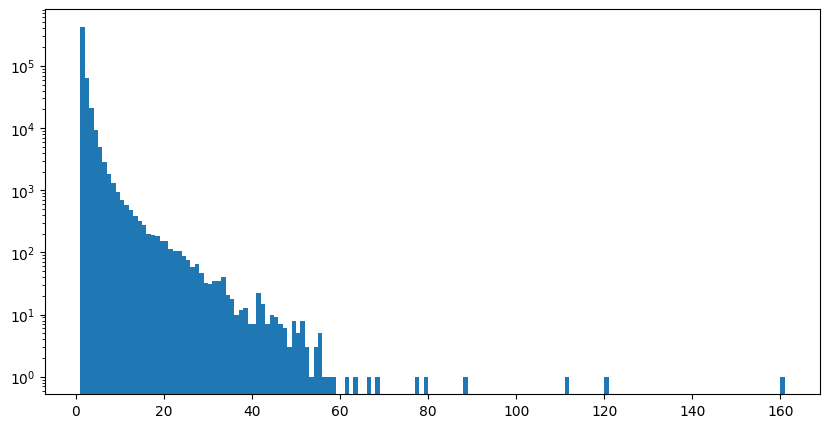

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(all_ques.value_counts().values , log=True , bins = 160)
plt.show()

# Ranodm forest model building

In [ ]:
df = df.sample(10000 , random_state = 1)[['question1' ,'question2','is_duplicate']]
df.shape

(10000, 3)

In [ ]:
df.head()

,question1,question2,is_duplicate
402502,"Is ""G"" based on real events?","Is ""Enough"" based on real event?",0
187257,How did movies like Happy New Year earn 300 cr...,How do senseless movies like DILWALE or HAPPY ...,1
29381,What's the best way to tell my crush I like him?,How do I tell a girl I like her?,0
24194,If you roll a fair six-sided die and a fair fo...,If you roll a fair six-sided die and a fair fo...,0
291941,Can anyone give me list of the scams by Congre...,How do I get total police station list of india?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 402502 to 357819
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question1     10000 non-null  object
 1   question2     10000 non-null  object
 2   is_duplicate  10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [ ]:
all_ques = list(df['question1']) + list(df['question2'])
all_ques = pd.Series(all_ques , name = 'question')
all_ques

,question
0,"Is ""G"" based on real events?"
1,How did movies like Happy New Year earn 300 cr...
2,What's the best way to tell my crush I like him?
3,If you roll a fair six-sided die and a fair fo...
4,Can anyone give me list of the scams by Congre...
...,...
19995,Is my painting worth selling?
19996,What anime movie reminds you of Disney's The L...
19997,Why are Romanian women so beautiful?
19998,Is it possible for a psychopath to be in love?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000, binary=True)
bow = cv.fit_transform(all_ques)

In [ ]:
bow.toarray().shape

(20000, 3000)

In [ ]:
bow.toarray()[:10000].shape

(10000, 3000)

In [ ]:
# againg spllit into 2 columns
bow = np.hstack((bow.toarray()[:10000] ,bow.toarray()[10000:]))

In [ ]:
bow.shape

(10000, 6000)

In [ ]:
temp_df = pd.DataFrame(bow , index = df.index)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
402502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24194,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
291941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117491,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
295389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df  = pd.merge(temp_df , df['is_duplicate'] , left_index=True , right_index=True)

In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,is_duplicate
402502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24194,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
291941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117491,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
295389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(final_df.iloc[: , :-1] , final_df.iloc[:,-1] , test_size = 0.2, random_state = 2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(8000, 6000)
(2000, 6000)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

print(accuracy_score(y_test , rf.predict(x_test)))
confusion_matrix(y_test , rf.predict(x_test))

0.737


array([[1202,   69],
       [ 457,  272]])